In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charts style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
foodora = pd.read_csv('Foodora Data.csv', encoding='latin-1') 
country = pd.read_excel('Country-Code.xlsx')

# Merge the files
df = pd.merge(foodora, country, on='Country Code', how='left')

print("Data Shape:", df.shape)
df.head(3)

Data Shape: (9551, 22)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [10]:
# Check Data Types
df.info()

# Missing Values
print("Missing Values:\n", df.isnull().sum())

# Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
# Clean up
# Dropping missing cuisines 
df.dropna(subset=['Cuisines'], inplace=True)
# Remove duplicates 
df.drop_duplicates(inplace=True)

print("\nCleaning Complete. Final Shape:", df.shape)


Cleaning Complete. Final Shape: (9542, 22)


**COUNTRY PERFORMANCE METRICS**

In [51]:
# Average number of restaurants in a city for each country and average rating
country_metrics = (
    df
    .groupby(['Country', 'City'])
    .agg(
        Restaurants_in_City=('Restaurant ID', 'count'),
        Avg_Rating_in_City=('Aggregate rating', 'mean'),
        Avg_Votes_in_City=('Votes', 'mean')
    )
    .groupby('Country')
    .agg(
        Avg_Restaurants_Per_City=('Restaurants_in_City', 'mean'),
        Avg_Rating=('Avg_Rating_in_City', 'mean'),
        Avg_votes=('Avg_Votes_in_City', 'mean')
    )
    .reset_index()
)

display(country_metrics.sort_values(by='Avg_Restaurants_Per_City', ascending=True).head(15))

,Country,Avg_Restaurants_Per_City,Avg_Rating,Avg_votes
2,Canada,1.000000,3.575000,103.000000
0,Australia,1.043478,3.652174,110.065217
6,Phillipines,2.444444,4.461111,374.101852
4,Indonesia,5.250000,4.176563,729.796875
9,South Africa,10.000000,4.333333,412.005808
14,United States,12.500000,3.878639,328.870770
11,Turkey,17.000000,4.298929,495.782143
1,Brazil,20.000000,3.763333,19.616667
5,New Zealand,20.000000,4.262500,243.025000
7,Qatar,20.000000,4.060000,163.800000


**CITY SPECIFIC METRICS**

,Country,City,Restaurant_Count,Total_Votes,Avg_Rating,Avg_Cost
61,India,New Delhi,5473,628340,2.438845,596.088069
45,India,Gurgaon,1118,132160,2.651431,714.016100
62,India,Noida,1080,73488,2.036204,539.490741
42,India,Faridabad,251,6486,1.866932,447.609562
43,India,Ghaziabad,25,2366,2.852000,602.000000


,Country,City,Restaurant_Count,Total_Votes,Avg_Rating,Avg_Cost
47,India,Hyderabad,18,24135,4.344444,1361.111111
106,United States,Albany,17,1446,3.552941,22.647059
75,Indonesia,Jakarta,16,11883,4.356250,308437.500000
98,Turkey,ÛÁstanbul,14,12043,4.292857,81.428571
95,South Africa,Sandton,11,5410,4.300000,375.909091


C:\Users\Asus\AppData\Local\Temp\ipykernel_26308\875273470.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


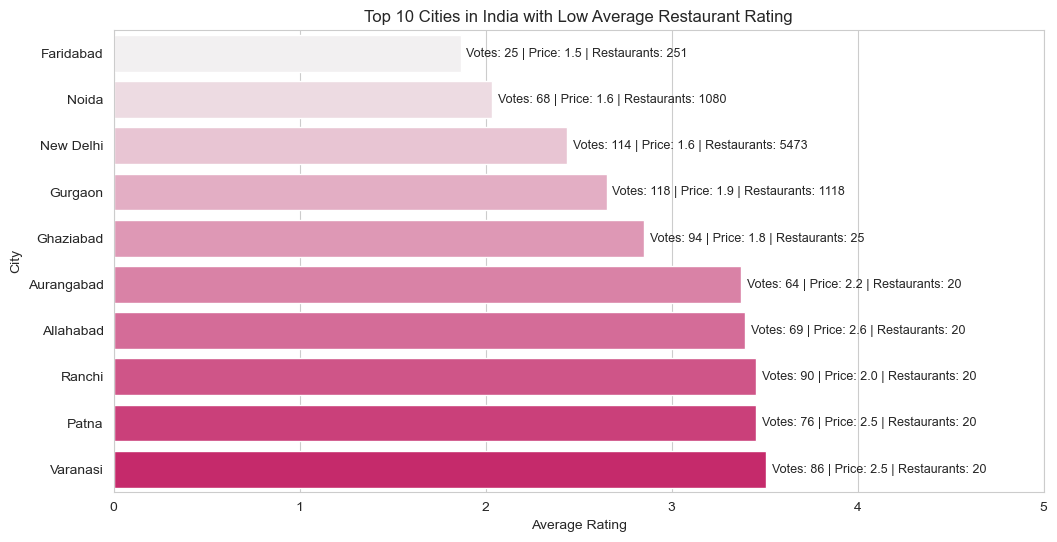

In [66]:
# Group by Country and City to calculate key stats
city_stats = df.groupby(['Country', 'City']).agg({
    'Restaurant ID': 'count',           # Count of Restaurants
    'Votes': 'sum',                     # Total Engagement
    'Aggregate rating': 'mean',         # Quality Score
    'Average Cost for two': 'mean'      # Price positioning
}).reset_index()

# Rename columns for clarity
city_stats.columns = ['Country', 'City', 'Restaurant_Count', 'Total_Votes', 'Avg_Rating', 'Avg_Cost']

# Filter: cities with > 10 restaurants to avoid noise
active_cities = city_stats[city_stats['Restaurant_Count'] > 10].sort_values(by='Restaurant_Count', ascending=False)

# Show the table for analysis
display(active_cities.head())
display(active_cities.tail())

from seaborn import light_palette

# VISUALIZATION: Top 10 Cities with Low Average Rating for India
india_df = df[df['Country'] == 'India']

city_data = (
    india_df.groupby('City')
    .agg(
        Avg_Rating=('Aggregate rating', 'mean'),
        Avg_Votes=('Votes', 'mean'),
        Avg_Price_Range=('Price range', 'mean'),
        Restaurant_Count=('Restaurant ID', 'count')
    )
    .reset_index()
)

top_10_cities = city_data.sort_values(
    by='Avg_Rating',
    ascending=True
).head(10)

# Create a custom palette using #df1067
custom_palette = light_palette("#df1067", n_colors=len(top_10_cities), reverse=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top_10_cities,
    x='Avg_Rating',
    y='City',
    palette=custom_palette
)

plt.title('Top 10 Cities in India with Low Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.xlim(0, 5)

# Add labels
for i, row in top_10_cities.reset_index(drop=True).iterrows():
    ax.text(
        row['Avg_Rating'] + 0.03,
        i,
        f"Votes: {int(row['Avg_Votes'])} | "
        f"Price: {row['Avg_Price_Range']:.1f} | "
        f"Restaurants: {row['Restaurant_Count']}",
        va='center',
        fontsize=9
    )

plt.show()


High saturation leads to quality dilution.

**LOCALITY ANALYSIS OF NEW DELHI**

Undiscovered Hotspots (High Quality, Low Visibility):


,Locality,Aggregate rating,Votes,Restaurant ID
26,Chawri Bazar,3.8,1410,12


,Locality,Restaurant_Count,Avg_Rating
33,Connaught Place,122,3.686885
181,Rajouri Garden,99,3.591919
194,Shahdara,87,1.413793
46,Defence Colony,86,3.210465
167,Pitampura,85,2.870588
133,Mayur Vihar Phase 1,84,2.026190
128,Malviya Nagar,84,3.417857
180,Rajinder Nagar,81,2.943210
185,Safdarjung,80,2.801250
191,Satyaniketan,79,3.482278


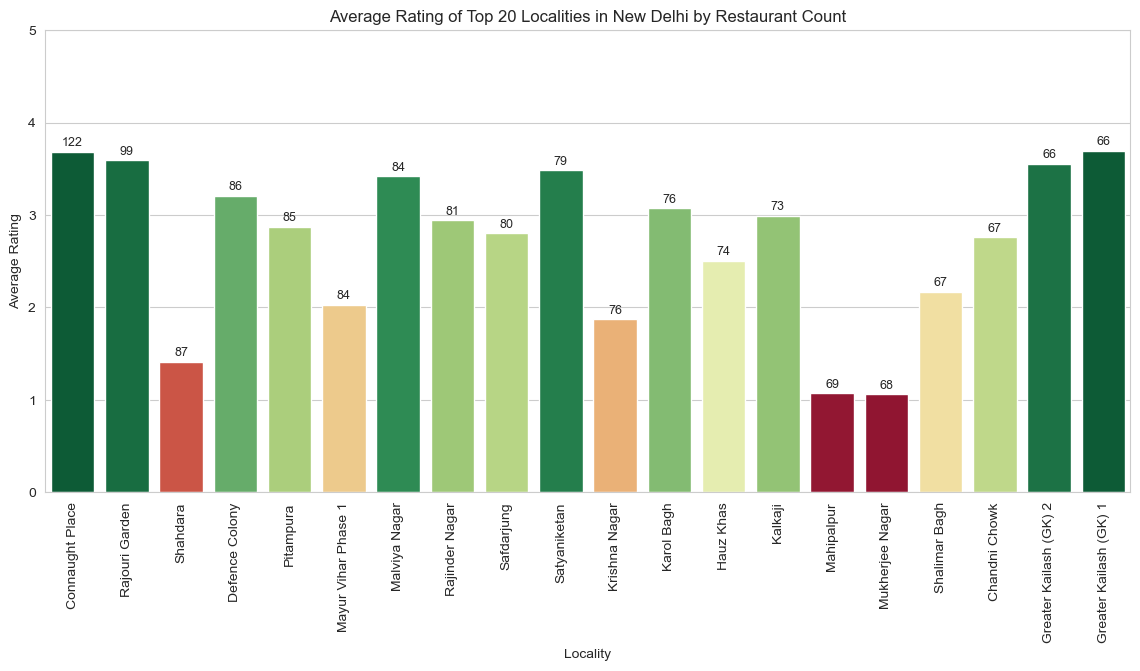

In [68]:
city_df = df[df['City'] == 'New Delhi']

# Aggregate by Locality
locality_stats = city_df.groupby('Locality').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).reset_index()

# Filter for significant localities (more than 10 restaurants)
significant_localities = locality_stats[locality_stats['Restaurant ID'] > 10]

# IDENTIFYING "UNDISCOVERED HOTSPOTS" (High Rating, Low Votes)
# We look for rating > 3.5 but votes below the median
hotspots = significant_localities[
    (significant_localities['Aggregate rating'] > 3.5) & 
    (significant_localities['Votes'] < significant_localities['Votes'].median())
]

print("Undiscovered Hotspots (High Quality, Low Visibility):")
display(hotspots)

# TABLE: Top 20 Localities by Number of Restaurants with their Average Rating
top_localities_table = (
    significant_localities
    .sort_values(by='Restaurant ID', ascending=False)
    .head(20)
    .rename(columns={
        'Restaurant ID': 'Restaurant_Count',
        'Aggregate rating': 'Avg_Rating'
    })
)
display(
    top_localities_table[['Locality', 'Restaurant_Count', 'Avg_Rating']]
)


# VISUALIZATION: Rating Distribution across Localities
plt.figure(figsize=(14,6))
# Get top 20 localities by restaurant count
top_localities = significant_localities.sort_values(by='Restaurant ID',ascending=False).head(20)
ax = sns.barplot(data=top_localities,x='Locality',y='Aggregate rating',hue='Aggregate rating',palette='RdYlGn',dodge=False,legend=False)
plt.xticks(rotation=90)
plt.title('Average Rating of Top 20 Localities in New Delhi by Restaurant Count')
plt.xlabel('Locality')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Zoom in to see differences
# Add restaurant count on top of each bar
for i, row in top_localities.reset_index(drop=True).iterrows():
    ax.text(
        i,
        row['Aggregate rating'] + 0.03,
        int(row['Restaurant ID']),
        ha='center',
        va='bottom',
        fontsize=9
    )
plt.show()

**CUISINES ANALYSIS**

C:\Users\Asus\AppData\Local\Temp\ipykernel_26308\3478813891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['Cuisines_List'] = delhi_df['Cuisines'].str.split(', ')


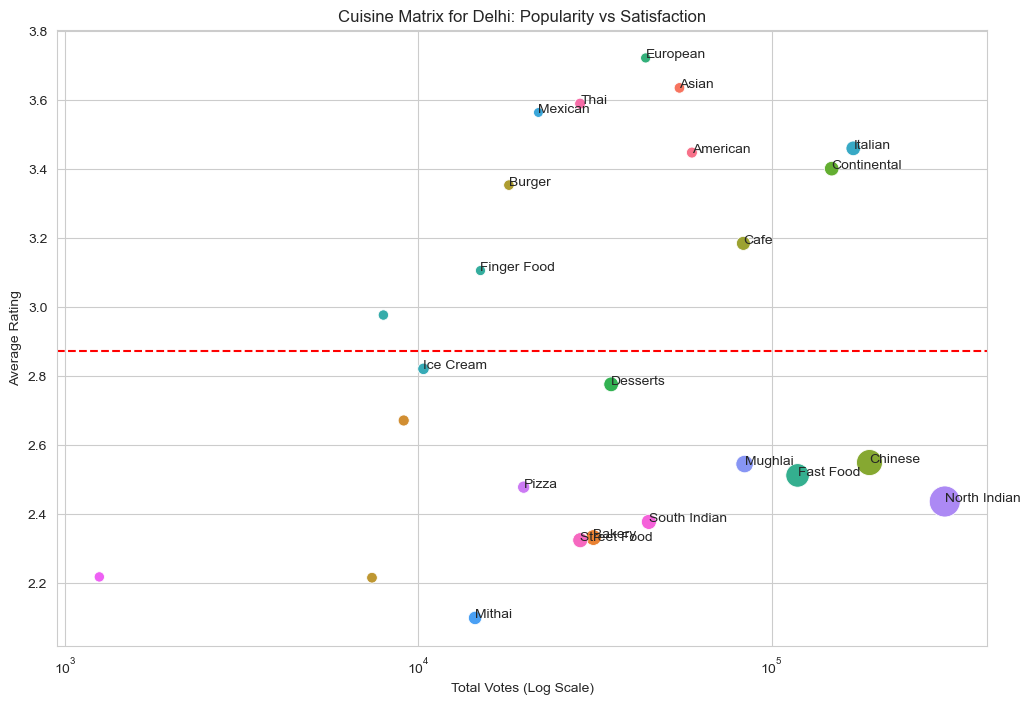

In [69]:
# Filter data for Delhi only
delhi_df = df[df['City'] == 'New Delhi']   # use 'Delhi' if that is the exact value in your data

# Split the cuisines text into a list
delhi_df['Cuisines_List'] = delhi_df['Cuisines'].str.split(', ')

# Explode the list so each cuisine gets its own row
cuisine_exploded = delhi_df.explode('Cuisines_List')
# Group by the individual Cuisine
cuisine_stats = cuisine_exploded.groupby('Cuisines_List').agg({
    'Restaurant ID': 'count',
    'Votes': 'sum',
    'Aggregate rating': 'mean'
}).reset_index()

# Rename columns
cuisine_stats.columns = ['Cuisine', 'Count', 'Total_Votes', 'Avg_Rating']

# Filter for popular cuisines (> 50 restaurants)
popular_cuisines = cuisine_stats[cuisine_stats['Count'] > 50]

# VISUALIZATION: The "Opportunity Matrix" (Delhi Only)
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=popular_cuisines,
    x='Total_Votes',
    y='Avg_Rating',
    size='Count',
    sizes=(50, 500),
    hue='Cuisine',
    legend=False
)

# Add labels to extreme points
for i in range(popular_cuisines.shape[0]):
    if (popular_cuisines.Total_Votes.iloc[i] > 10000 or 
        popular_cuisines.Avg_Rating.iloc[i] > 4.0):
        plt.text(
            popular_cuisines.Total_Votes.iloc[i],
            popular_cuisines.Avg_Rating.iloc[i],
            popular_cuisines.Cuisine.iloc[i],
            fontsize=10
        )

plt.title('Cuisine Matrix for Delhi: Popularity vs Satisfaction')
plt.xscale('log')
plt.xlabel('Total Votes (Log Scale)')
plt.ylabel('Average Rating')
plt.axhline(
    y=popular_cuisines['Avg_Rating'].mean(),
    color='red',
    linestyle='--'
)
plt.show()

**ANALYSIS ON OPERATIONAL FACTORS**

C:\Users\Asus\AppData\Local\Temp\ipykernel_26308\2835044182.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Asus\AppData\Local\Temp\ipykernel_26308\2835044182.py:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
C:\Users\Asus\AppData\Local\Temp\ipykernel_26308\2835044182.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Asus\AppData\Local\Temp\ipykernel_26308\2835044182.py:26: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
C:\Users\Asus\AppData\Local\Temp\ipykernel_26308\283

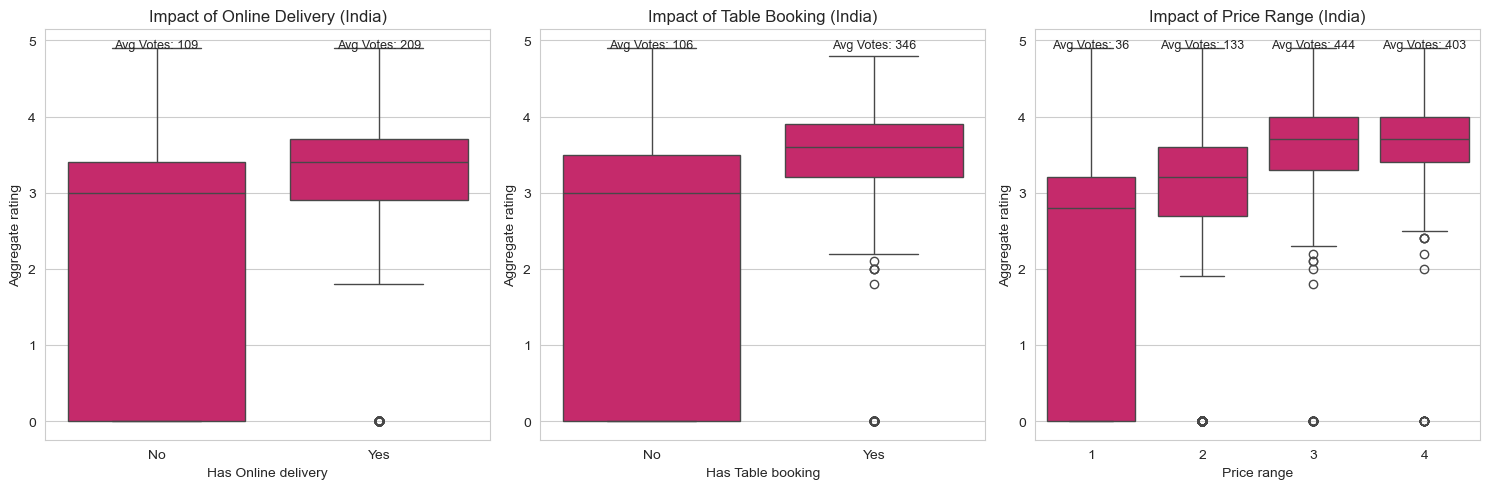

In [71]:
from seaborn import light_palette
# Filter data for India only
india_df = df[df['Country'] == 'India']

# Impact of Online Delivery (India)
plt.figure(figsize=(15, 5))

# 1. Online Delivery
plt.subplot(1, 3, 1)
sns.boxplot(
    x='Has Online delivery',
    y='Aggregate rating',
    data=india_df,
    palette=['#df1067']
)
plt.title('Impact of Online Delivery (India)')

# Add average votes
avg_votes_delivery = india_df.groupby('Has Online delivery')['Votes'].mean()
for i, val in enumerate(avg_votes_delivery):
    plt.text(i, 4.9, f'Avg Votes: {int(val)}', ha='center', fontsize=9)


# 2. Table Booking
plt.subplot(1, 3, 2)
sns.boxplot(
    x='Has Table booking',
    y='Aggregate rating',
    data=india_df,
    palette=['#df1067']
)
plt.title('Impact of Table Booking (India)')

# Add average votes
avg_votes_booking = india_df.groupby('Has Table booking')['Votes'].mean()
for i, val in enumerate(avg_votes_booking):
    plt.text(i, 4.9, f'Avg Votes: {int(val)}', ha='center', fontsize=9)


# 3. Price Range
plt.subplot(1, 3, 3)
sns.boxplot(
    x='Price range',
    y='Aggregate rating',
    data=india_df,
    palette=['#df1067']
)
plt.title('Impact of Price Range (India)')

# Add average votes
avg_votes_price = india_df.groupby('Price range')['Votes'].mean()
for i, val in enumerate(avg_votes_price):
    plt.text(i, 4.9, f'Avg Votes: {int(val)}', ha='center', fontsize=9)


plt.tight_layout()
plt.show()


**HIDDEN GEMS & OVERRATED PLACE**

In [65]:
# We define "Hidden Gems" as:
# Rating > 4.5 (Excellent Food)
# Votes < 200 (Low visibility)
# Price Range < 3 (Affordable)

hidden_gems_india = df[
    (df['Country'] == 'India') &                # India filter
    (df['Aggregate rating'] > 4.5) & 
    (df['Votes'] < 200) & 
    (df['Price range'] < 3)
]

print(f"Found {len(hidden_gems_india)} Hidden Gem Restaurants in India.")

display(
    hidden_gems_india[
        ['Restaurant Name', 'City', 'Locality', 'Cuisines',
         'Aggregate rating', 'Votes', 'Price range']
    ].head(10)
)

Found 5 Hidden Gem Restaurants in India.


,Restaurant Name,City,Locality,Cuisines,Aggregate rating,Votes,Price range
637,Sheroes Hangout,Agra,Tajganj,"Cafe, North Indian, Chinese",4.9,77,1
653,Cryo Lab,Ahmedabad,Ellis Bridge,"Desserts, Ice Cream",4.6,166,2
2281,The Basement Cafí©,Guwahati,Chandmari,Cafe,4.7,126,2
2456,Aman Chicken,Ludhiana,Shastri Nagar,"North Indian, Mughlai",4.6,196,2
6426,Food Scouts,New Delhi,Punjabi Bagh,"North Indian, Chinese, Continental",4.6,61,2


Foodora should run a 'Hidden Gems' marketing campaign featuring these specific restaurants